In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.3.0'

In [27]:

mnist = tf.keras.datasets.mnist
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [36]:
(x_train , y_train), (x_test, y_test) = mnist.load_data()



In [37]:
import matplotlib.pyplot as plt
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

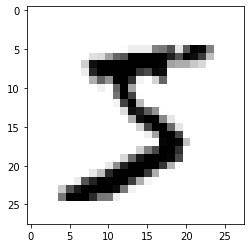

In [38]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [39]:
# Normalizing the data 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_train, axis = 1)


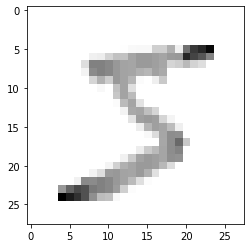

In [40]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

Building the model

In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =3)



Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9250
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9766


 Saving the model and using it for prediction


In [42]:
model.save('num_reader')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_reader/assets


In [44]:
new = tf.keras.models.load_model('num_reader')

In [46]:
predictions = new.predict([x_test])
predictions

array([[2.2850005e-11, 4.9800075e-09, 1.0941503e-09, ..., 2.3744942e-10,
        2.2294315e-10, 5.3274891e-07],
       [9.9987984e-01, 3.0655241e-07, 1.1457743e-04, ..., 1.6094307e-06,
        5.8947769e-08, 2.8155253e-07],
       [5.6652821e-11, 1.3107810e-05, 2.6988841e-04, ..., 4.4665503e-05,
        8.6530690e-07, 1.0213611e-07],
       ...,
       [1.1727289e-12, 1.9048689e-10, 1.0089060e-12, ..., 2.0423032e-12,
        1.7216559e-08, 1.3841370e-07],
       [8.3909283e-05, 1.3674601e-04, 5.7751953e-05, ..., 3.9848201e-06,
        3.2657451e-06, 5.7680611e-09],
       [1.2137123e-06, 8.2163012e-08, 2.1199257e-06, ..., 1.4554425e-06,
        9.9997640e-01, 5.6617455e-06]], dtype=float32)

In [47]:
import numpy as np
print(np.argmax(predictions[0]))


5


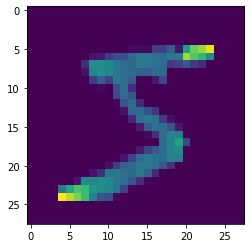

In [48]:
plt.imshow(x_test[0])
plt.show()